In [4]:
import numpy as np
import pulp as pulp
from pulp import *
import random
from tqdm import tqdm
from useful import *
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from scipy.stats import linregress
from scipy.optimize import minimize

In [83]:
# Dimensions
d = [5, 10, 15, 20, 25, 30]

# Data for each category
strong_dense = [797, 851, 881, 900, 916, 928]
weak_dense = [408, 448, 482, 497, 517, 534]
strong_tri = [627, 536, 483, 429, 414, 394]
weak_tri = [331, 279, 266, 248, 246, 253]

# Transforming the values into percentages (values out of 1000)
strong_dense_percent = [x / 1000 * 100 for x in strong_dense]
weak_dense_percent = [x / 1000 * 100 for x in weak_dense]
strong_tri_percent = [x / 1000 * 100 for x in strong_tri]
weak_tri_percent = [x / 1000 * 100 for x in weak_tri]

# Recreating the bar plot with percentages and adjusted legend
plt.figure(figsize=(12,8))

plt.bar(r1, strong_dense_percent, color='b', width=bar_width, edgecolor='grey', label='Strong-Dense')
plt.bar(r2, weak_dense_percent, color='r', width=bar_width, edgecolor='grey', label='Weak-Dense')
plt.bar(r3, strong_tri_percent, color='g', width=bar_width, edgecolor='grey', label='Strong-Tri')
plt.bar(r4, weak_tri_percent, color='y', width=bar_width, edgecolor='grey', label='Weak-Tri')

plt.xlabel('Dimension $d$', fontweight='bold',size=20)
plt.ylabel('Non-Degenerate Instances (%)', fontweight='bold',size=20)
plt.xticks([r + bar_width for r in range(len(strong_dense_percent))], d)

plt.title('Bar Chart for Different Categories across Dimensions (Percentage)',size=18)
plt.legend(loc='upper left',fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.savefig("non-degenerate-percentage.pdf")


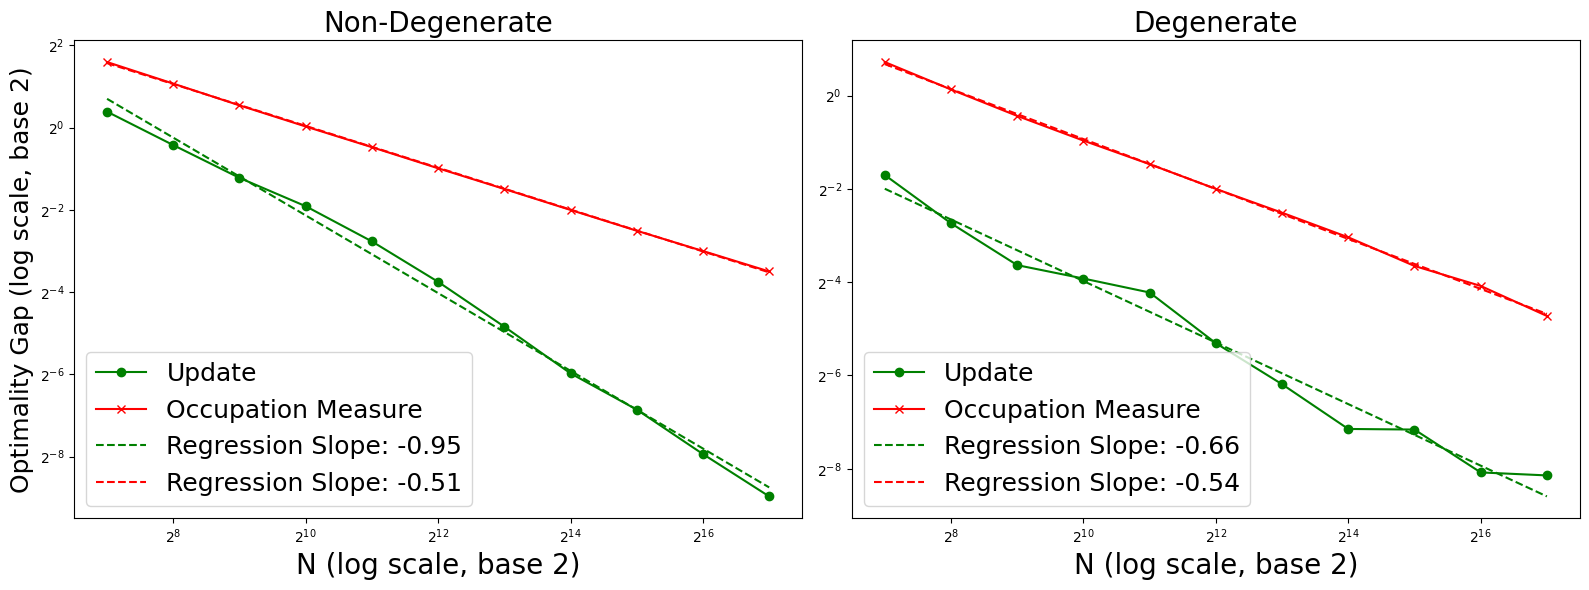

In [85]:
myN = [2**n for n in range(7,18)]

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)

data = np.load('non-degenerate-sim.npz', allow_pickle=True)
infos = data['infos']
infos = infos.tolist()
infos = infos[2:]

diff_update = [info[0] - info[1][0] for info in infos]
diff_occupation_measure = [info[0] - info[2][0] for info in infos]

# Log transformation of the data
log_myN = np.log2(myN)
log_diff_update = np.log2(np.abs(diff_update))  # Taking absolute value to avoid issues with log of negative numbers
log_diff_occupation_measure = np.log2(np.abs(diff_occupation_measure))

# Perform linear regression
slope_update, intercept_update, _, _, _ = linregress(log_myN, log_diff_update)
slope_occupation_measure, intercept_occupation_measure, _, _, _ = linregress(log_myN, log_diff_occupation_measure)

# Plotting original data
plt.plot(myN, diff_update, label='Update', marker='o',color='g')
plt.plot(myN, diff_occupation_measure, label='Occupation Measure', marker='x',color='r')

# Plotting regression lines and including slopes in the labels
plt.plot(myN, 2 ** (slope_update * log_myN + intercept_update), label=f'Regression Slope: {slope_update:.2f}', linestyle='--',color='g')
plt.plot(myN, 2 ** (slope_occupation_measure * log_myN + intercept_occupation_measure), 
         label=f'Regression Slope: {slope_occupation_measure:.2f}', linestyle='--',color='r')

# Setting log scale for both axes with base 2
plt.xscale('log', base=2)
plt.yscale('log', base=2)

# Labels, title, and legend
plt.xlabel('N (log scale, base 2)',size=20)
plt.ylabel('Optimality Gap (log scale, base 2)',size=18)
plt.title('Non-Degenerate',size=20)
plt.legend(fontsize=18)

# Customizing the tick labels for log base 2
plt.gca().xaxis.set_major_locator(LogLocator(base=2))
plt.gca().yaxis.set_major_locator(LogLocator(base=2))

plt.subplot(1, 2, 2)

data = np.load('degenerate-sim.npz', allow_pickle=True)
infos = data['infos']
infos = infos.tolist()

diff_update = [info[0] - info[1][0] for info in infos]
diff_occupation_measure = [info[0] - info[2][0] for info in infos]

# Log transformation of the data
log_myN = np.log2(myN)
log_diff_update = np.log2(np.abs(diff_update))  # Taking absolute value to avoid issues with log of negative numbers
log_diff_occupation_measure = np.log2(np.abs(diff_occupation_measure))

# Perform linear regression
slope_update, intercept_update, _, _, _ = linregress(log_myN, log_diff_update)
slope_occupation_measure, intercept_occupation_measure, _, _, _ = linregress(log_myN, log_diff_occupation_measure)

# Plotting original data
plt.plot(myN, diff_update, label='Update', marker='o',color='g')
plt.plot(myN, diff_occupation_measure, label='Occupation Measure', marker='x',color='r')

# Plotting regression lines and including slopes in the labels
plt.plot(myN, 2 ** (slope_update * log_myN + intercept_update), label=f'Regression Slope: {slope_update:.2f}', linestyle='--',color='g')
plt.plot(myN, 2 ** (slope_occupation_measure * log_myN + intercept_occupation_measure), 
         label=f'Regression Slope: {slope_occupation_measure:.2f}', linestyle='--',color='r')

# Setting log scale for both axes with base 2
plt.xscale('log', base=2)
plt.yscale('log', base=2)

# Labels, title, and legend
plt.xlabel('N (log scale, base 2)',size=20)
#plt.ylabel('Difference (log scale, base 2)')
plt.title('Degenerate',size=20)
plt.legend(fontsize=18)

# Customizing the tick labels for log base 2
plt.gca().xaxis.set_major_locator(LogLocator(base=2))
plt.gca().yaxis.set_major_locator(LogLocator(base=2))

plt.tight_layout()

plt.savefig("rate.pdf")

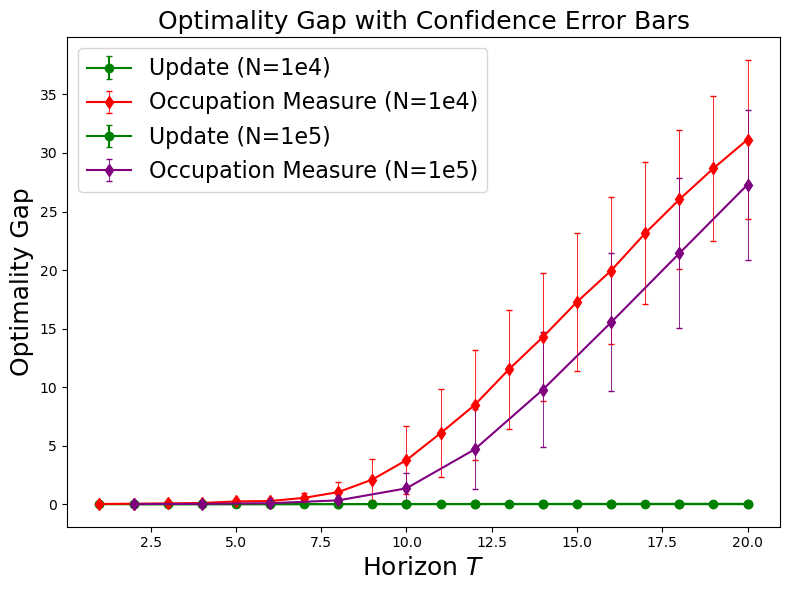

In [88]:
# N = 10000
infos = [[5.663710678647074, [5.66214922696591, 1.7763568394002505e-15], [5.643979869502134, 0.011318425213910247]],
         [11.13926065225175, [11.136337500060261, 0.008272239560813568], [11.090818956573655, 0.01977992044319496]],
         [16.636309811289134, [16.631995524461963, 0.0103976757277098], [16.5668908359881, 0.02613965447948561]],
         [22.102873519577027, [22.097975070680995, 0.014208296942137315], [21.994962738717046, 0.04384710262580452]],
         [27.60433754204474, [27.5935420105886, 0.01684372721763979], [27.363719047720878, 0.1565906002325303]],
         [33.08768566259808, [33.077228745071345, 0.021149656349272142], [32.813109017007655, 0.16271990741373932]],
         [38.600147831687416, [38.58531409832214, 0.02286197591703624], [38.05616715798913, 0.3878298000231374]],
         [44.099831752565834, [44.08204550245003, 0.02705418100388935], [43.06407899621417, 0.8977954092904205]],
         [49.617393100737075, [49.597592611534814, 0.029245530714319474], [47.509208423477816, 1.7611090495804547]],
         [55.12895910202472, [55.108409665582805, 0.03331867277816655], [51.361994017522726, 2.877391142795951]],
         [60.65054378467326, [60.62774279820251, 0.035464761228674035], [54.581956390433305, 3.7370743738483343]],
         [66.16918266941904, [66.14580773602627, 0.039615794543809375], [57.691873366388506, 4.659569336424897]],
         [71.69363063160374, [71.66664605591333, 0.041296106977109226], [60.18305290794693, 5.090732299129091]],
         [77.21653943580928, [77.18968179591073, 0.0440956356726234], [62.933135372788094, 5.460042670357341]],
         [82.74293083214722, [82.71349178743809, 0.04607169312595212], [65.45999216094597, 5.884109146620919]],
         [88.26845509914274, [88.23718830181984, 0.04820767243105484], [68.31036820163533, 6.311474702868357]],
         [93.79612789223654, [93.76346848424136, 0.04977182438674452], [70.64744922298866, 6.047890943307006]],
         [99.32327356850624, [99.28662458587635, 0.05311532402811746], [73.29162743958575, 5.91268358534865]],
         [104.85177597187227, [104.81467123053811, 0.057655386047708215], [76.15950800374225, 6.212595622979675]],
         [110.3799364685871, [110.3451301320203, 0.0547638539959799], [79.23011220335809, 6.827554453983608]]]

# N = 100000
infos1 = [[11.138807524528668, [11.13864856396491, 0.0024210529038430793], [11.123032245235676, 0.006855168710301664]],
        [22.102302731697637, [22.1018729054783, 0.004469762665211278], [22.069296394419126, 0.013487928260440046]],
        [33.08705597798163, [33.085092904680195, 0.006418864323180288], [32.99864843736979, 0.051994271270175994]],
        [44.099164079886656, [44.09620134156413, 0.008496564011198913], [43.76838701616914, 0.28913204932870307]],
        [55.12826768801393, [55.12461571506086, 0.010322443232000636], [53.76948945852864, 1.2731593522996156]],
        [66.1684762819279, [66.1638648754989, 0.012266413311282661], [61.48116687306512, 3.406484575477976]],
        [77.21582362326915, [77.21038451222995, 0.013632942426370002], [67.42084370895739, 4.939305337793648]],
        [88.26773316964824, [88.26168770245043, 0.015199751754528893], [72.73088711244651, 5.905857203768846]],
        [99.32254799859749, [99.31671857292609, 0.016881891922822738], [77.89113956150197, 6.394463292094271]],
        [110.37920859489529, [110.37231963344811, 0.018420582981405628], [83.07738459582228, 6.403007113480616]]]


myT = np.arange(1,21,1)
myT1 = np.arange(2,22,2)

diff_update = [info[0] - info[1][0] for info in infos]
std_update = [info[1][1] for info in infos]

diff_update1 = [info1[0] - info1[1][0] for info1 in infos1]
std_update1 = [info1[1][1] for info1 in infos1]

diff_occupation_measure = [info[0] - info[2][0] for info in infos]
std_occupation_measure = [info[2][1] for info in infos]

diff_occupation_measure1 = [info1[0] - info1[2][0] for info1 in infos1]
std_occupation_measure1 = [info1[2][1] for info1 in infos1]

# Linear regression for diff_occupation_measure
slope_occupation_un, intercept_occupation_un, r_value_occupation_un, _, _ = linregress(myT, diff_occupation_measure)
r_squared_occupation_un = r_value_occupation_un**2

# Define the objective function for linear regression
def linear_regression_objective(params, x, y):
    slope, intercept = params
    predicted = slope * x + intercept
    return np.sum((y - predicted) ** 2)

# Constraint for a positive intercept
constraint = {'type': 'ineq', 'fun': lambda params: params[1]}

# Initial guess for the parameters
initial_guess = [0, 0]

# Perform constrained linear regression for diff_update
result_update = minimize(linear_regression_objective, initial_guess, args=(myT, diff_update), constraints=constraint)
slope_update, intercept_update = result_update.x
predicted_update = slope_update * myT + intercept_update
ss_res_update = np.sum((diff_update - predicted_update) ** 2)
ss_tot_update = np.sum((diff_update - np.mean(diff_update)) ** 2)
r_squared_update = 1 - (ss_res_update / ss_tot_update)

# Perform constrained linear regression for diff_occupation_measure
result_occupation = minimize(linear_regression_objective, initial_guess, args=(myT, diff_occupation_measure), constraints=constraint)
slope_occupation, intercept_occupation = result_occupation.x
predicted_occupation = slope_occupation * myT + intercept_occupation
ss_res_occupation = np.sum((diff_occupation_measure - predicted_occupation) ** 2)
ss_tot_occupation = np.sum((diff_occupation_measure - np.mean(diff_occupation_measure)) ** 2)
r_squared_occupation = 1 - (ss_res_occupation / ss_tot_occupation)


plt.figure(figsize=(8, 6))

# First subplot: error bars
plt.errorbar(myT, diff_update, yerr=std_update, color='green', label='Update (N=1e4)', fmt='o-', ecolor='g', capsize=2)
plt.errorbar(myT, diff_occupation_measure, yerr=std_occupation_measure, color='red', label='Occupation Measure (N=1e4)', fmt='d-', ecolor='r', 
             capsize=2, elinewidth=0.6)
plt.errorbar(myT1, diff_update1, yerr=std_update1, color='green', label='Update (N=1e5)', fmt='o-', ecolor='g', capsize= 2)
plt.errorbar(myT1, diff_occupation_measure1, yerr=std_occupation_measure1, color='purple', label='Occupation Measure (N=1e5)', fmt='d-', 
             ecolor='purple',capsize=2, elinewidth=0.6)
plt.xlabel('Horizon $T$', size=18)
plt.ylabel('Optimality Gap', size=18)
plt.title('Optimality Gap with Confidence Error Bars', size=18)
plt.legend(fontsize=16)


plt.tight_layout()

plt.savefig("gap-with-T-1.pdf")

In [90]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(myT, diff_update, 'o', color='g', label='Update (N=1e4)')
plt.plot(myT, slope_update * myT + intercept_update, 'g--', label=f'(Un)constrained Linear Fit (R² = {r_squared_update:.2f})')
plt.xlabel('Horizon $T$', size=18)
#plt.ylabel('Optimality Gap', size=15)
plt.title('Linear Regression for Update', size=20)
plt.legend(fontsize=18)

plt.subplot(1, 2, 2)
plt.plot(myT, diff_occupation_measure, 'd', color='r', label='Occupation Measure (N=1e4)')
plt.plot(myT, slope_occupation * myT + intercept_occupation, 'r--', label=f'Constrained Linear Fit (R² = {r_squared_occupation:.2f})')
plt.plot(myT, slope_occupation_un * myT + intercept_occupation_un, 'b-.', label=f'Unconstrained Linear Fit (R² = {r_squared_occupation_un:.2f})')
plt.xlabel('Horizon $T$', size=18)
#plt.ylabel('Optimality Gap', size=15)
plt.title('Linear Regression for Occupation Measure', size=20)
plt.legend(fontsize=18)

plt.tight_layout()

plt.savefig("gap-with-T-2.pdf")
